<a href="https://colab.research.google.com/github/gourjyotsana/TED-Talk-Views-second-capstone/blob/main/individual_capstone_notebook_ted_talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Designtogether, TED Conferences have gone on to become the Mecca of ideas from virtually allwalks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,Jimmy Wales, Shahrukh Khan, and Bill Gates.
## <b>The main objective is to build a predictive model, which could help in predicting the views ofthe videos uploaded on the TEDx website.

## Importing required packages for data visualization and machine learning

In [1]:
#Packages
import pandas as pd
import numpy as np
from numpy import math

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


from sklearn.model_selection import train_test_split


# machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

##Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ted_talk = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

##Dataset description
  dataset contain features like-

  * **talk_id:** Talk identification number provided by TED
  * **title:** Title of the talk
  * **speaker_1**: **bold text** First speaker in TED's speaker list
  * **all_speakers:** Speakers in the talk
  * **occupations:** Occupations of the speakers
  * **about_speakers:** Blurb about each speaker
  * **recorded_date:** Date the talk was recorded
  * **published_date:** Date the talk was published to TED.com
  * **event:** Event or medium in which the talk was given
  * **native_lang:** Language the talk was given in
  * **available_lang:** All available languages (lang_code) for a talk
  * **comments:** Count of comments
  * **duration:** Duration in seconds
  * **topics:** Related tags or topics for the talk
  * **related_talks:** Related talks (key='talk_id',value='title')
  * **url:** URL of the talk
  * **description:** Description of the talk
  * **transcript:** Full transcript of the talk
  * **views:** The number of views on the talk.

In [4]:
# First look of the data
ted_talk.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [5]:
ted_talk.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [6]:
#look at the shape of the data
ted_talk.shape

(4005, 19)

We have a total of 4005 rows and 19 columns in our data.

In [7]:
pd.DataFrame([[col, ted_talk[col].nunique(), ted_talk[col].isna().sum()]  for  col  in ted_talk], columns = ['Column Name', 'Unique Count', 'Missing Count'])

,Column Name,Unique Count,Missing Count
0,talk_id,4005,0
1,title,4005,0
2,speaker_1,3274,0
3,all_speakers,3306,4
4,occupations,2049,522
5,about_speakers,2977,503
6,views,3996,0
7,recorded_date,1334,1
8,published_date,2962,0
9,event,459,0


We have null values in columns in occupation,about_spekers and comments.

In [8]:
#droping some columns as it is of no use
ted_talk.drop(['url','all_speakers', 'about_speakers','native_lang'],axis = 1,inplace=True)

#Checking for duplicate value in data

In [9]:
len(ted_talk[ted_talk.duplicated()])

0

We do not have any duplicate value in our data.

##**Exploratory Data Analysis**

In [10]:
# All columns in the data
ted_talk.columns

Index(['talk_id', 'title', 'speaker_1', 'occupations', 'views',
       'recorded_date', 'published_date', 'event', 'available_lang',
       'comments', 'duration', 'topics', 'related_talks', 'description',
       'transcript'],
      dtype='object')

In [11]:
# Arranging the data set
ted_talk.reset_index()

,index,talk_id,title,speaker_1,occupations,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
0,0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,1,92,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,2,7,Simplicity sells,David Pogue,{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,3,53,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: ['health activist']},502934,2020-04-22,2020-04-27,TED2020: The Prequel,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,4001,62782,The dark history of IQ tests,Stefan C Dombrowski,NaN,307187,2020-04-27,2020-04-27,TED-Ed,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: ['law researcher']},464414,2019-06-22,2020-04-28,TEDxMileHigh,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...","Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,NaN,56582,2020-04-28,2020-04-30,TED-Ed,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


let us investigate the summary statistics and the distibution of the views on various TED Talks.

(0.0, 10000000.0)

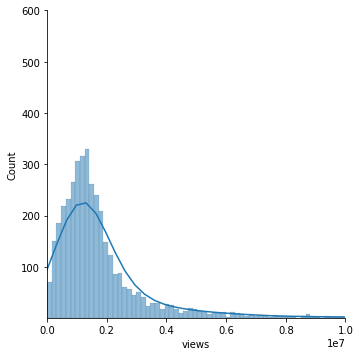

In [12]:
# kde = kernel density estimate
sns.displot(ted_talk['views'],kde =True)
plt.ylim(1,600)
plt.xlim(0,1e7)

In [13]:
ted_talk['views'].describe()

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
25%      8.820690e+05
50%      1.375508e+06
75%      2.133110e+06
max      6.505195e+07
Name: views, dtype: float64

**Observation**

* Average number of views on ted talk is nearly **2.1 millions**. 

* Maximum number of views on ted talk is **6.5 millions**.

* Total counts of views is **4 millions**.

#Have a look at top 5 most viwed ted talk and their speaker

In [14]:
#Extarcting the records of top 5 most viewed videos
top_ted_talk = ted_talk.nlargest(5, ['views'])
top_ted_talk[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


Now,look at the graph

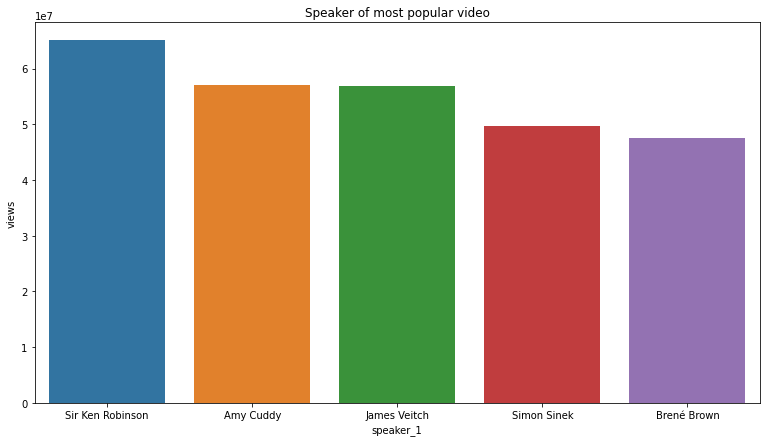

In [15]:
#top 5 most popular speaker bar plot
plt.figure(figsize=(13,7))
plt.title("Speaker of most popular video")
sns.barplot(x='speaker_1',y='views',data = top_ted_talk)

From above graph we came to know that Sir Ken Robinson talk on Do schools kill creativity? is the highest watched talk with 65051954	viwes.

# Analysing TED Talks by the month and the year
What is the most frequent times for TED talks? How many months do you have left to prepare? We need to know when will the battle take place! 

In [16]:
ted_talk['published_date'].value_counts()

2017-09-07    27
2019-02-15    24
2019-02-12    23
2019-03-15    22
2019-04-01    22
              ..
2013-04-25     1
2013-04-26     1
2013-04-29     1
2013-04-30     1
2014-01-24     1
Name: published_date, Length: 2962, dtype: int64

In [17]:
#on the basis of year
year_series = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

In [18]:
ted_talk['year'] = ted_talk['published_date'].apply(lambda x: year_series[int(x.split('-')[1]) - 0])
year_ted_talk = pd.DataFrame(ted_talk['year'].value_counts()).reset_index()

year_ted_talk.columns = ['year', 'talks']

In [19]:
ted_talk['year'].value_counts()

2010    423
2009    419
2008    412
2016    350
2007    348
2015    347
2011    312
2012    310
2017    305
2013    278
2018    265
2014    236
Name: year, dtype: int64

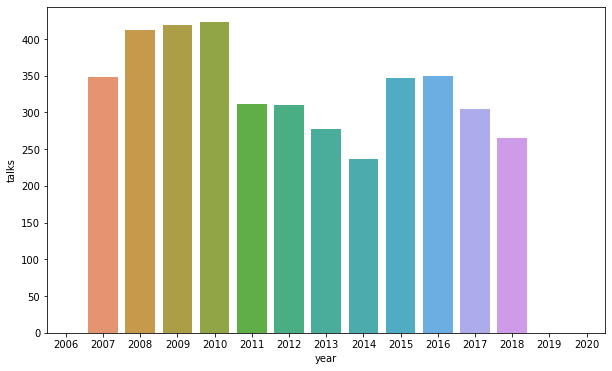

In [20]:
#plotting a graph
plt.figure(figsize = (10,6))
sns.barplot(x='year', y='talks', data=year_ted_talk, order=year_series)

In **2010** most of the videos are published.

In [21]:
import datetime

In [22]:
from datetime import datetime
from datetime import date

In [23]:
# Extracring month  from recorded date column
month_series = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [24]:
ted_talk['month'] = ted_talk['published_date'].apply(lambda x: month_series[int(x.split('-')[1]) - 1])
month_ted_talk = pd.DataFrame(ted_talk['month'].value_counts()).reset_index()

month_ted_talk.columns = ['month', 'talks']

In [25]:
ted_talk['month'].value_counts()

Apr    423
Mar    419
Feb    412
Oct    350
Jan    348
Sep    347
May    312
Jun    310
Nov    305
Jul    278
Dec    265
Aug    236
Name: month, dtype: int64

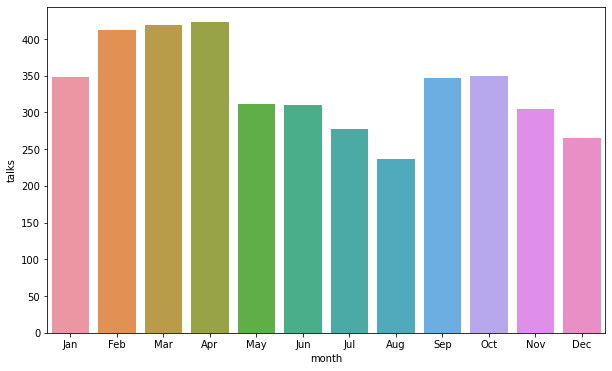

In [26]:
#plotting a graph
plt.figure(figsize = (10,6))
sns.barplot(x='month', y='talks', data=month_ted_talk, order=month_series)

**April** is most popular month for TED Talks followed by **March** and **February**.On the other hand **December** and **August** are least popular.

## Analysing the occupation of speaker

In [27]:
ted_talk['occupations'].value_counts()

{0: ['writer']}                               53
{0: ['journalist']}                           47
{0: ['entrepreneur']}                         42
{0: ['artist']}                               41
{0: ['architect']}                            38
                                              ..
{0: ['director', 'designer']}                  1
{0: ['life saver']}                            1
{0: ['author', 'researcher', 'podcaster']}     1
{0: ['advertising expert']}                    1
{0: ['law researcher']}                        1
Name: occupations, Length: 2049, dtype: int64

In [28]:
occupation_ted = ted_talk[ted_talk['occupations']!= 'unknown'].groupby('occupations').count().reset_index()[['occupations', 'views']]
occupation_ted.columns = ['occupations', 'appearances']
occupation_ted = occupation_ted.sort_values('appearances', ascending=False)
occupation_ted

,occupations,appearances
2038,{0: ['writer']},53
1096,{0: ['journalist']},47
766,{0: ['entrepreneur']},42
156,{0: ['artist']},41
119,{0: ['architect']},38
...,...,...
758,"{0: ['entrepreneur', 'podcaster', 'storyteller']}",1
757,"{0: ['entrepreneur', 'philanthropist'], 1: ['h...",1
756,"{0: ['entrepreneur', 'marketer']}",1
755,"{0: ['entrepreneur', 'lego enthusiast']}",1


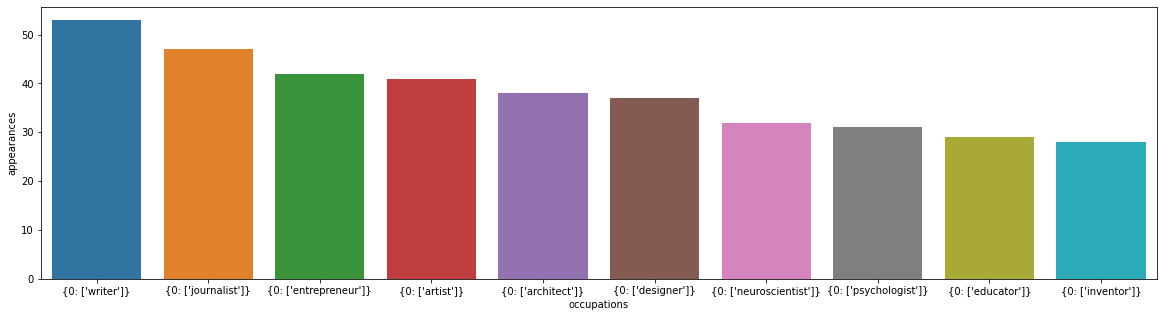

In [29]:
plt.figure(figsize=(20,5))
sns.barplot(x='occupations', y='appearances', data=occupation_ted.head(10))

**Observations**

* **Writers** are the most popular speaker with more than 50 videos.
* **journalist** and **entrepreneur** are on second and third position.

##Analysing some numerical features.

In [30]:
numeric_features = ted_talk.describe().columns
numeric_features

Index(['talk_id', 'views', 'comments', 'duration', 'year'], dtype='object')

Skewness: 1.421452
Kurtosis: 0.740040


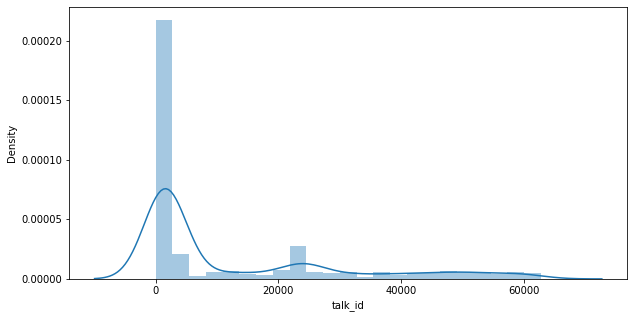

In [31]:
#distplot to show distribution of talk_id column

plt.figure(figsize=(10,5))
sns.distplot((ted_talk['talk_id']))
print("Skewness: %f" % ted_talk['talk_id'].skew())
print("Kurtosis: %f" % ted_talk['talk_id'].kurt())

Skewness: 8.185744
Kurtosis: 98.737918


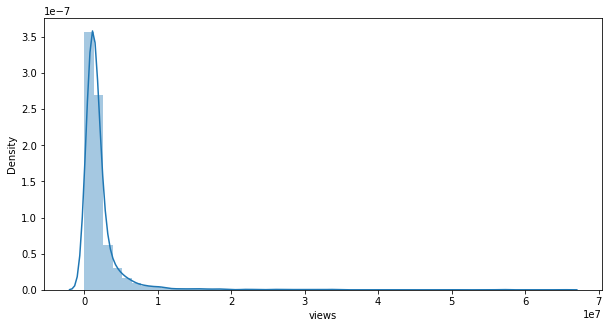

In [32]:
#distplot to show distribution of views  column

plt.figure(figsize=(10,5))
sns.distplot((ted_talk['views']))
print("Skewness: %f" % ted_talk['views'].skew())
print("Kurtosis: %f" % ted_talk['views'].kurt())

Skewness: 8.865357
Kurtosis: 143.035387


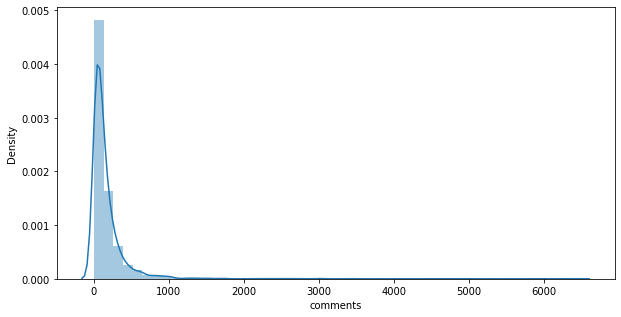

In [33]:
#Distplot to show distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot((ted_talk['comments']))
print("Skewness: %f" % ted_talk['comments'].skew())
print("Kurtosis: %f" % ted_talk['comments'].kurt())

Skewness: 1.185608
Kurtosis: 6.849223


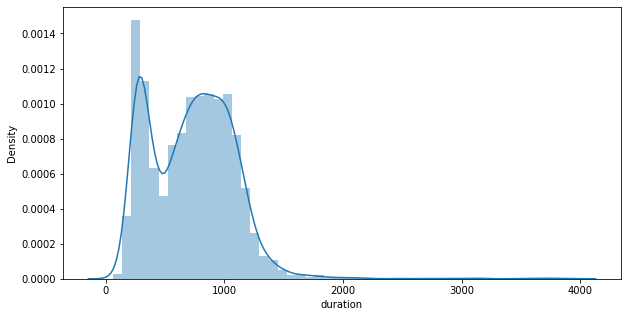

In [34]:
# Distplot to show distribution of duration column.

plt.figure(figsize=(10,5))
sns.distplot((ted_talk['duration']))
print("Skewness: %f" % ted_talk['duration'].skew())
print("Kurtosis: %f" % ted_talk['duration'].kurt())

Skewness: 0.157687
Kurtosis: -1.266458


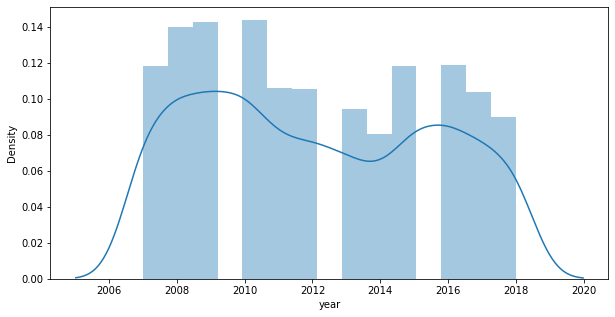

In [35]:
# Distplot to show distribution of year column.

plt.figure(figsize=(10,5))
sns.distplot((ted_talk['year']))
print("Skewness: %f" % ted_talk['year'].skew())
print("Kurtosis: %f" % ted_talk['year'].kurt())

#Let's try to make it noraml distribution..by tranforming the data into some other form..and then visualize the thing..

Skewness: 1.421452
Kurtosis: 0.740040


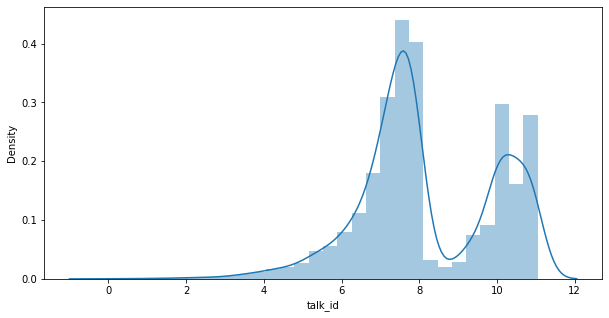

In [36]:
#transformed distplot to show distribution of talk_id column 
#right skewed data
plt.figure(figsize=(10,5))
sns.distplot(np.log(ted_talk['talk_id']))
print("Skewness: %f" % ted_talk['talk_id'].skew())
print("Kurtosis: %f" % ted_talk['talk_id'].kurt())

Skewness: 8.865357
Kurtosis: 143.035387


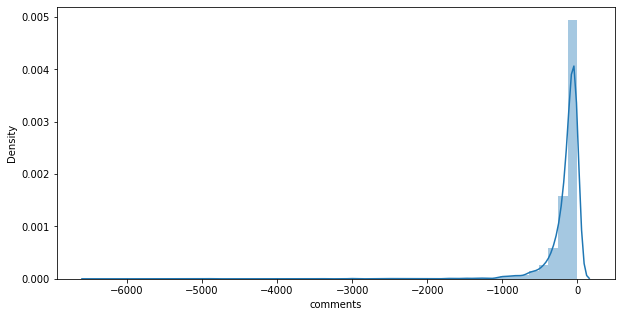

In [37]:
#transformed Distplot to show distribution of comments column
#left skewed data
plt.figure(figsize=(10,5))
sns.distplot(np.log(ted_talk['comments']+1)- ted_talk['comments'])
print("Skewness: %f" % ted_talk['comments'].skew())
print("Kurtosis: %f" % ted_talk['comments'].kurt())

Skewness: 8.185744
Kurtosis: 98.737918


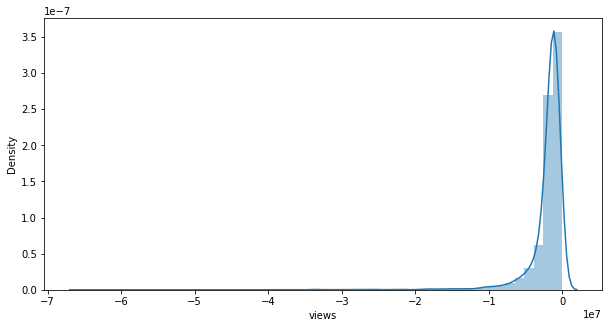

In [38]:
# transformed distplot to show distribution of views  column
#left skewed data
plt.figure(figsize=(10,5))
sns.distplot(np.log10(ted_talk['views']+1)- ted_talk['views'])
print("Skewness: %f" % ted_talk['views'].skew())
print("Kurtosis: %f" % ted_talk['views'].kurt())

Skewness: 1.185608
Kurtosis: 6.849223


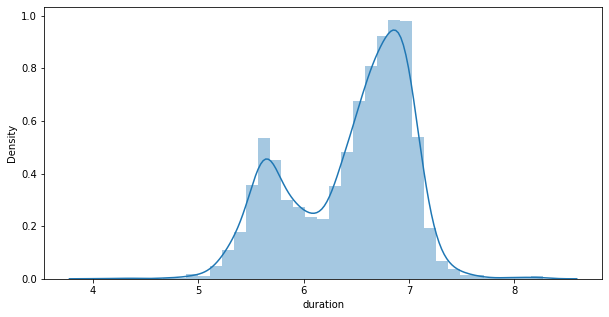

In [39]:
#transformed Distplot to show distribution of duration column.
#right skewed data
plt.figure(figsize=(10,5))
sns.distplot(np.log(ted_talk['duration']))
print("Skewness: %f" % ted_talk['duration'].skew())
print("Kurtosis: %f" % ted_talk['duration'].kurt())

Skewness: 0.157687
Kurtosis: -1.266458


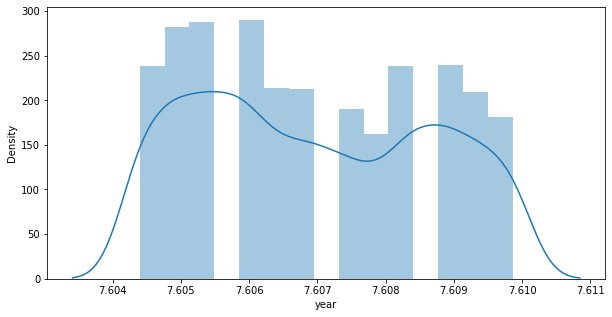

In [40]:
#transformed Distplot to show distribution of year column.
#right skewed data
plt.figure(figsize=(10,5))
sns.distplot(np.log(ted_talk['year']))
print("Skewness: %f" % ted_talk['year'].skew())
print("Kurtosis: %f" % ted_talk['year'].kurt())

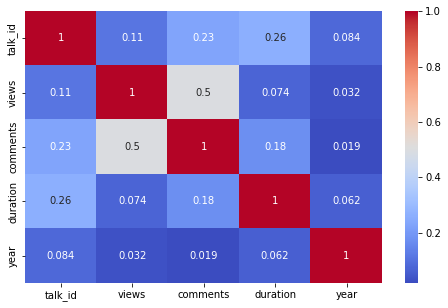

In [41]:
# Correlation
plt.figure(figsize=(8,5))
correlation = ted_talk.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#**Feature Engineering on some columns.**

**Speaker_1 column**

In [42]:
speaker_ted = ted_talk.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_ted = speaker_ted.to_dict()
speaker_ted = speaker_ted.values()
speaker_ted =  list(speaker_ted)[0]
ted_talk['event_wise_avg_view']=ted_talk['speaker_1'].map(speaker_ted)

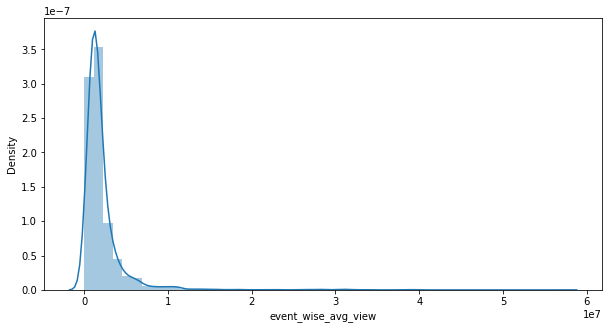

In [43]:
# Distribution 

plt.figure(figsize=(10,5))
sns.distplot(ted_talk['event_wise_avg_view'])

* Now, we have done target encoding on categorical values in the event column.
* We can further use this feature directly while modelling.
* We can drop the event column now.


In [44]:
#drop event column
df=ted_talk.drop(columns='event')

**published_date column.**

In [45]:
#creating video_age column which is the difference of current year and published year.**
ted_talk['talk_age'] = 2022-ted_talk['year']

In [46]:
#here we can drop published_date column
ted_talk = ted_talk.drop(columns='published_date')

**available_lang column**

In [47]:
# Applying eval function on available_lang column
ted_talk['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

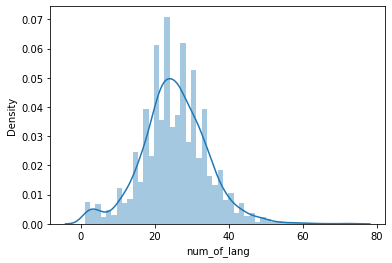

In [48]:
len(ted_talk['available_lang'][10])
ted_talk['num_of_lang'] = ted_talk.apply(lambda x: len(x['available_lang']), axis=1)

#dropping the available_lang column
ted_talk.drop(columns='available_lang',inplace=True)

sns.distplot(ted_talk['num_of_lang'])



# **check outliers in the data**

In [49]:
Q1 = ted_talk.quantile(0.25)
Q3 = ted_talk.quantile(0.75)
IQR = Q3 - Q1

((ted_talk < (Q1 - 1.5 * IQR)) | (ted_talk > (Q3 + 1.5 * IQR))).sum()

comments               261
description              0
duration                21
event                    0
event_wise_avg_view    373
month                    0
num_of_lang            121
occupations              0
recorded_date            0
related_talks            0
speaker_1                0
talk_age                 0
talk_id                119
title                    0
topics                   0
transcript               0
views                  393
year                     0
dtype: int64

We have outliers in some columns,replacing the outliers with extreme values

**Replacing the outliers**

In [50]:
for col in ['comments','talk_id','duration','event_wise_avg_view','num_of_lang','views']:
  Q1 = ted_talk[col].quantile(0.25)
  Q3 = ted_talk[col].quantile(0.75)
  IQR = Q3 - Q1

  ted_talk[col]=np.where(ted_talk[col]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(ted_talk[col]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),ted_talk[col]))

In [51]:
Q1 = ted_talk.quantile(0.25)
Q3 = ted_talk.quantile(0.75)
IQR = Q3 - Q1

((ted_talk < (Q1 - 1.5 * IQR)) | (ted_talk > (Q3 + 1.5 * IQR))).sum()

comments               0
description            0
duration               0
event                  0
event_wise_avg_view    0
month                  0
num_of_lang            0
occupations            0
recorded_date          0
related_talks          0
speaker_1              0
talk_age               0
talk_id                0
title                  0
topics                 0
transcript             0
views                  0
year                   0
dtype: int64

As we can see that now we don't have any outliers.

#**cleaning the data**

In [52]:
#drooping the unsueful and categorical columns
ted_talk.drop(columns = ['comments','title','speaker_1','occupations','recorded_date','event','topics','related_talks','description','transcript'],inplace = True)

In [53]:
ted_talk.head(1)

,talk_id,views,duration,year,month,event_wise_avg_view,talk_age,num_of_lang
0,1.0,3523392.0,977.0,2012,Jun,2190599.25,10,43.0


#**Seprate the dependent and independent variable**

In [54]:
y = ted_talk['views']
x = ted_talk.drop(columns='views')

In [55]:
x=pd.get_dummies(x)
x.shape

(4005, 18)

Views is our dependent variable.

#Applying train test split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Scaling the data

In [57]:
#transforming the data
scalar = MinMaxScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

#**Linear Regression model**

In [58]:
#fitting multiple linear regression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
regressor.coef_

array([ 1.09427990e+05,  3.11144238e+05, -1.15229790e+04,  3.42533567e+06,
        1.15229790e+04,  6.89102179e+05,  2.91091810e+04, -1.86148539e+04,
        1.64540773e+04,  2.26781192e+03, -1.45351036e+04,  2.15085655e+04,
       -3.96961159e+04,  3.18051545e+04, -1.20117618e+04, -4.86465104e+04,
        1.44155890e+04,  1.79439663e+04])

In [60]:
regressor.score(x_train, y_train)

0.8092561534851637

In [61]:
len(regressor.coef_)

18

In [62]:
y_pred = regressor.predict(x_test)

In [63]:
MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 210722523409.92825
MAE : 251874.6516391365
RMSE : 459045.23024417565


In [64]:
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.8233445776625881
Adjusted R2 :  0.8192783403197832


#**Lasso regression model**

In [65]:
lass = Lasso(alpha = 0.1, max_iter = 3000)

In [66]:
lass.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [67]:
lass.score(x_train, y_train)

0.8092561534823844

In [68]:
prediction_lasso = lass.predict(x_test)

In [69]:
MSE  = mean_squared_error((y_test),(prediction_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(prediction_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(prediction_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(prediction_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 210722626909.40536
MAE : 251874.46291800772
RMSE : 459045.34297758143
R2 : 0.8233444908956704
Adjusted R2 :  0.819278251555673


# **Cross validation and  hyperparametertunning for lasso**

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [72]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -238032054856.80005


In [73]:
MSE  = mean_squared_error((y_test),(prediction_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(prediction_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(prediction_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 210722626909.40536
RMSE : 459045.34297758143
R2 : 0.8233444908956704
Adjusted R2 :  0.819278251555673


#**Ridge Regression**

In [74]:
ridge  = Ridge(alpha=0.1)

In [75]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [76]:
ridge.score(x_train, y_train)

0.8092560218894969

In [77]:
y_pred_r = ridge.predict(x_test)

In [78]:
MSE  = mean_squared_error((y_test),(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_r)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 210741813346.52902
MAE : 252033.23582545694
RMSE : 459066.2406957508
R2 : 0.8233284062925706
Adjusted R2 :  0.8192617967187423


#**Cross validation and hyperparametertunning for Ridge**



In [79]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [80]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 100}  the negative mean squared error is:  -239629047042.5402


In [81]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [82]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 210724439705.51944
RMSE : 459047.31750171405
R2 : 0.8233429711707831
Adjusted R2 :  0.819276696849906
